# Supplementary Figure S1 - S3

Distribution of SV sizes; Comparison of WI, N2 and PB306 derived lines

/Users/ayush/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Kolmogorov-Smirnov Test Statistic: 0.2969673919802405
P-value: 0.0064179268507015275
Mean of Wild_Isolates: 602.68, Median of Wild_Isolates: 125.00
Mean of MA: 1039.94, Median of MA: 404.00
Plot saved as sv_size_plot_wi_ma_hist.pdf.


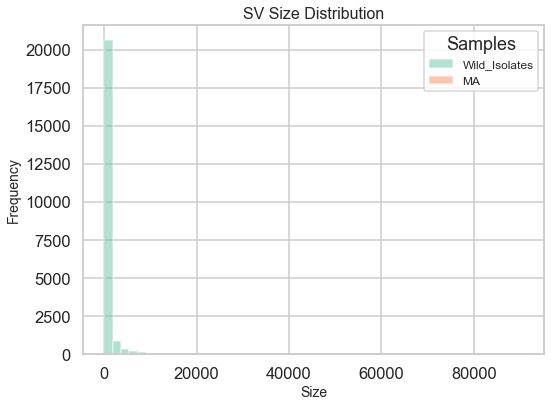

Kolmogorov-Smirnov Test Statistic: 0.2969673919802405
P-value: 0.0064179268507015275
Mean of Wild_Isolates: 582.00, Median of Wild_Isolates: 124.00
Mean of MA: 1039.94, Median of MA: 404.00
Plot saved as sv_size_plot_wi_ma_non_negative_kde.pdf.


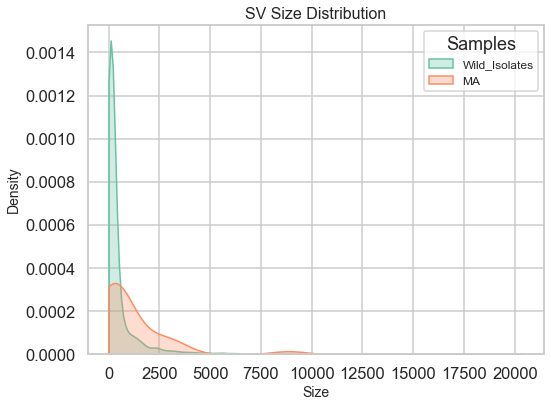

Kolmogorov-Smirnov Test Statistic: 0.43353865955686305
P-value: 0.00443153795186646
Mean of Wild_Isolates: 798.90, Median of Wild_Isolates: 162.00
Mean of MA: 1574.53, Median of MA: 840.00
Plot saved as sv_ins_size_plot_wi_ma_non_neg_kde.pdf.


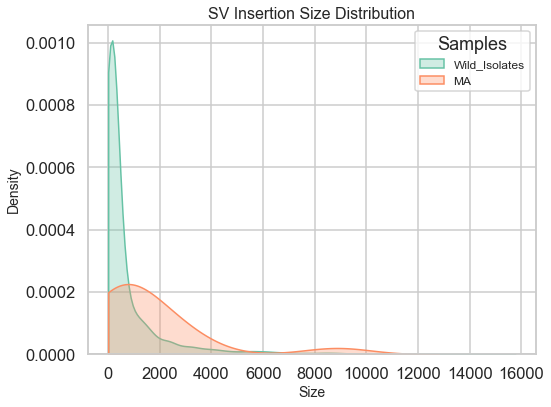

Kolmogorov-Smirnov Test Statistic: 0.21620734908136485
P-value: 0.38724010333521464
Mean of Wild_Isolates: 375.43, Median of Wild_Isolates: 105.00
Mean of MA: 538.75, Median of MA: 131.00
Plot saved as sv_del_size_plot_wi_ma_non_neg_kde.pdf.


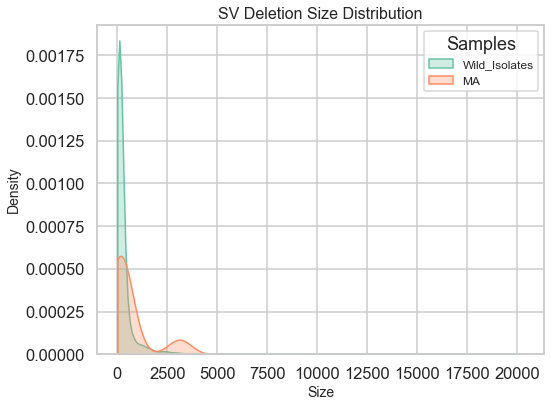

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ks_2samp

# Function to read integers from a file with filtering
def read_integers(file_path, min_value=30):
    with open(file_path, "r") as f:
        return [int(line.strip()) for line in f if line.strip().isdigit() and abs(int(line.strip())) >= min_value]

# Function to perform KS test and plot data
def plot_sv_sizes(file_paths, labels, output_pdf="sv_size_density_plot.pdf", title = "Size Distribution Density Plot"):
    """
    Generates a density plot and performs KS tests for size distributions.
    
    Parameters:
        file_paths (list): List of file paths to process.
        labels (list): List of labels corresponding to the file paths.
        output_pdf (str): Name of the output PDF for the plot.
    """
    if len(file_paths) != len(labels):
        raise ValueError("Number of file paths must match the number of labels.")
    
    # Read data
    data = [read_integers(file) for file in file_paths]
    
    # Perform KS test for pairwise comparisons
    if len(data) == 2:
        stat, p_value = ks_2samp(data[0], data[1])
        print(f"Kolmogorov-Smirnov Test Statistic: {stat}")
        print(f"P-value: {p_value}")
    else:
        print("KS test is only performed for two datasets.")
    
    # Plot settings
    plt.figure(figsize=(8, 6))
    sns.set_theme(style="whitegrid", context="talk")
    colors = sns.color_palette("Set2", len(file_paths))
    
    # Plot density
    for i, (d, label) in enumerate(zip(data, labels)):
        sns.kdeplot(d, label=label, fill=True, alpha=0.3, color=colors[i])
        
        # Calculate mean and median
        mean_val = np.mean(d)
        median_val = np.median(d)

        # Print mean and median
        print(f"Mean of {label}: {mean_val:.2f}, Median of {label}: {median_val:.2f}")
    
    # Add labels, title, and legend
    plt.xlabel("Size", fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend(title="Samples", fontsize=12)
    plt.tight_layout()
    
    # Save plot as PDF
    plt.savefig(output_pdf, dpi=300, format='pdf')
    print(f"Plot saved as {output_pdf}.")
    plt.show()
    
def plot_sv_sizes_non_neg_kde(file_paths, labels, output_pdf="sv_size_density_plot.pdf", title="Size Distribution Density Plot"):
    """
    Generates a density plot and performs KS tests for size distributions.

    Parameters:
        file_paths (list): List of file paths to process.
        labels (list): List of labels corresponding to the file paths.
        output_pdf (str): Name of the output PDF for the plot.
        bins (int): Number of bins for the histogram.
    """
    if len(file_paths) != len(labels):
        raise ValueError("Number of file paths must match the number of labels.")

    # Read data
    data = [read_integers(file) for file in file_paths]


    # Perform KS test for pairwise comparisons
    if len(data) == 2:
        stat, p_value = ks_2samp(data[0], data[1])
        print(f"Kolmogorov-Smirnov Test Statistic: {stat}")
        print(f"P-value: {p_value}")
    else:
        print("KS test is only performed for two datasets.")

    # Plot settings
    plt.figure(figsize=(8, 6))
    sns.set_theme(style="whitegrid", context="talk")
    colors = sns.color_palette("Set2", len(file_paths))
    
    # Removing high outliers from data
    data = [np.array([x for x in dataset if x < 20000]) for dataset in data]


    # Plot density with clipping to avoid negative values
    for i, (d, label) in enumerate(zip(data, labels)):
        sns.kdeplot(d, label=label, fill=True, alpha=0.3, color=colors[i], clip=(0, np.inf))

        # Calculate mean and median
        mean_val = np.mean(d)
        median_val = np.median(d)

        # Print mean and median
        print(f"Mean of {label}: {mean_val:.2f}, Median of {label}: {median_val:.2f}")

    # Add labels, title, and legend
    plt.xlabel("Size", fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend(title="Samples", fontsize=12)
    plt.tight_layout()

    # Save plot as PDF
    plt.savefig(output_pdf, dpi=300, format='pdf')
    print(f"Plot saved as {output_pdf}.")
    plt.show()


    
def plot_sv_sizes_hist(file_paths, labels, output_pdf="sv_size_histogram_plot.pdf", title="Size Distribution Histogram", bins=50):
    """
    Generates a histogram plot and performs KS tests for size distributions.

    Parameters:
        file_paths (list): List of file paths to process.
        labels (list): List of labels corresponding to the file paths.
        output_pdf (str): Name of the output PDF for the plot.
        bins (int): Number of bins for the histogram.
    """
    if len(file_paths) != len(labels):
        raise ValueError("Number of file paths must match the number of labels.")

    # Read data
    data = [read_integers(file) for file in file_paths]

    # Perform KS test for pairwise comparisons
    if len(data) == 2:
        stat, p_value = ks_2samp(data[0], data[1])
        print(f"Kolmogorov-Smirnov Test Statistic: {stat}")
        print(f"P-value: {p_value}")
    else:
        print("KS test is only performed for two datasets.")

    # Plot settings
    plt.figure(figsize=(8, 6))
    sns.set_theme(style="whitegrid", context="talk")
    colors = sns.color_palette("Set2", len(file_paths))

    # Plot histogram
    for i, (d, label) in enumerate(zip(data, labels)):
        plt.hist(d, bins=bins, alpha=0.5, label=label, color=colors[i])

        # Calculate mean and median
        mean_val = np.mean(d)
        median_val = np.median(d)

        # Print mean and median
        print(f"Mean of {label}: {mean_val:.2f}, Median of {label}: {median_val:.2f}")

    # Add labels, title, and legend
    plt.xlabel("Size", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend(title="Samples", fontsize=12)
    plt.tight_layout()

    # Save plot as PDF
    plt.savefig(output_pdf, dpi=300, format='pdf')
    print(f"Plot saved as {output_pdf}.")
    plt.show()

# MA v WI all
file_paths = [
    "/Users/ayush/Desktop/remapped_eicher_bams/illumina_bam_files/wild_isolates_sv_size.txt",
    "/Users/ayush/Desktop/remapped_eicher_bams/illumina_bam_files/MA_size.txt"
]
labels = ["Wild_Isolates", "MA"]

# plot_sv_sizes(file_paths, labels, "sv_size_plot_wi_ma.pdf", "SV Size Distribution")
plot_sv_sizes_hist(file_paths, labels, "sv_size_plot_wi_ma_hist.pdf", "SV Size Distribution")
plot_sv_sizes_non_neg_kde(file_paths, labels, "sv_size_plot_wi_ma_non_negative_kde.pdf", "SV Size Distribution")

# MA v WI Insertion
file_paths = [
    "/Users/ayush/Desktop/remapped_eicher_bams/illumina_bam_files/wild_isolates_ins_size.txt",
    "/Users/ayush/Desktop/remapped_eicher_bams/illumina_bam_files/MA_ins_size.txt"
]
labels = ["Wild_Isolates", "MA"]

# plot_sv_sizes(file_paths, labels, "sv_ins_size_plot_wi_ma.pdf", "SV Insertion Size Distribution")
plot_sv_sizes_non_neg_kde(file_paths, labels, "sv_ins_size_plot_wi_ma_non_neg_kde.pdf", "SV Insertion Size Distribution")

# MA v WI all
file_paths = [
    "/Users/ayush/Desktop/remapped_eicher_bams/illumina_bam_files/wild_isolates_del_size.txt",
    "/Users/ayush/Desktop/remapped_eicher_bams/illumina_bam_files/MA_del_size.txt"
]
labels = ["Wild_Isolates", "MA"]

# plot_sv_sizes(file_paths, labels, "sv_del_size_plot_wi_ma.pdf", "SV Deletion Size Distribution")
plot_sv_sizes_non_neg_kde(file_paths, labels, "sv_del_size_plot_wi_ma_non_neg_kde.pdf", "SV Deletion Size Distribution")
